# PROCESO DE ETL

In [38]:
# Importamos las librerias necesarias

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
# Webscraping para obtener todos los símbolos de acciones del S&P 500 junto con su sector y subsector

URL = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

SP500Companies = pd.read_html(URL)[0][['Symbol', 'GICS Sector']].rename(columns={'GICS Sector': 'Sector'}).copy()

# Renombramos las columnas por comodidad
SP500Companies.rename(columns={'GICS Sector': 'Sector'}, inplace=True)

# Renombramos algunos simbolos para evitar problemas a futuro
SP500Companies['Symbol'] = SP500Companies['Symbol'].str.strip().replace({'BF.B': 'BF-B', 'BRK.B': 'BRK-B'})

# Definir el rango de fechas
start_date = '2000-01-01'
end_date = '2023-02-24'

# Crear un DataFrame vacío para almacenar los datos
sp500_data = pd.DataFrame()

# Iterar a través de cada compañia del SP500 y agregamos los datos al Dataframe creado
for _, company in SP500Companies.iterrows():
    symbol = company['Symbol']
    sector = company['Sector']
    # Descargamos los datos de cada compañia
    data = yf.download(symbol, start=start_date, end=end_date)['Adj Close']
    if len(data) > 0:
        data = data.to_frame()
        data.loc[:, 'Symbol'] = symbol
        data.loc[:, 'Sector'] = sector
        sp500_data = pd.concat([sp500_data, data], axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [23]:
# Obteniendo los datos de solo el SP500
sp500_index = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [24]:
#Visualizamos ambos dataframes dataframes

sp500_data.head(-5)

,Adj Close,Symbol,Sector
Date,,,
2000-01-03,25.525517,MMM,Industrials
2000-01-04,24.511261,MMM,Industrials
2000-01-05,25.221237,MMM,Industrials
2000-01-06,27.249752,MMM,Industrials
2000-01-07,27.790689,MMM,Industrials
...,...,...,...
2023-02-09,160.809998,ZTS,Health Care
2023-02-10,158.330002,ZTS,Health Care
2023-02-13,163.139999,ZTS,Health Care


In [25]:
sp500_index.head(-5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-09,4144.250000,4156.229980,4069.669922,4081.500000,4081.500000,4270200000
2023-02-10,4068.919922,4094.360107,4060.790039,4090.459961,4090.459961,3891520000
2023-02-13,4096.620117,4138.899902,4092.669922,4137.290039,4137.290039,3448620000


In [27]:
# Guardo ambos datasets en archivos csv

sp500_index.to_csv('datasets/GSPC.csv')
sp500_data.to_csv('datasets/companies.csv')

In [3]:
# Abrimos el dataset de GSPC

sp500 = pd.read_csv('datasets/GSPC.csv')

# Cambiamos su indice a date
sp500.set_index('Date', inplace=True)

In [4]:
# Nos aseguramos que el index este en formato fecha
sp500.index= pd.to_datetime(sp500.index)

### Agregamos algunas columnas que nos serviran a futuro

In [5]:
# Nombre del dia
sp500['Day Name'] = sp500.index.day_name()

# Tasa del retorno activo

sp500['Daily Return'] = sp500['Adj Close'].pct_change()

In [7]:
# Volvemos a guardar el dataset

sp500.to_csv('datasets/GSPC.csv')

# PROCESO DE EDA

## EDA del dataset del GSPC

In [6]:
# reabrimos el csv 

sp500 = pd.read_csv('datasets/GSPC.csv')

In [7]:
# Hacemos que el indice sea la columna date y nos aseguremos que este en formato fecha
sp500.set_index('Date', inplace=True)
sp500.index = pd.to_datetime(sp500.index)

In [8]:
# Valores duplicados

sp500[sp500.duplicated()] 

,Open,High,Low,Close,Adj Close,Volume,Day Name,Daily Return
Date,,,,,,,,


In [9]:
# Veamos los valores nulos

sp500.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Day Name        0
Daily Return    1
dtype: int64

el valor faltante de daily return corresponde al primer dia del csv, ya que este calculo lo sacamos con el cierre del dia anterior

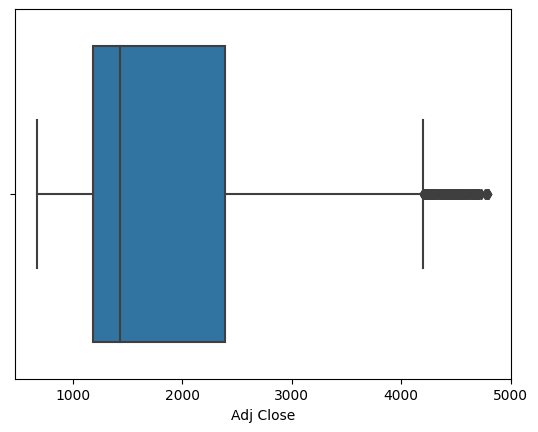

In [10]:
sns.boxplot(x = 'Adj Close', data = sp500)
plt.show()

In [11]:
# Scatterplot de correlacion y densidades
def plotScatterMatrix(df, plotSize, textSize):
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Correlación de densidades')
    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10924\1860440015.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10924\1860440015.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr().values


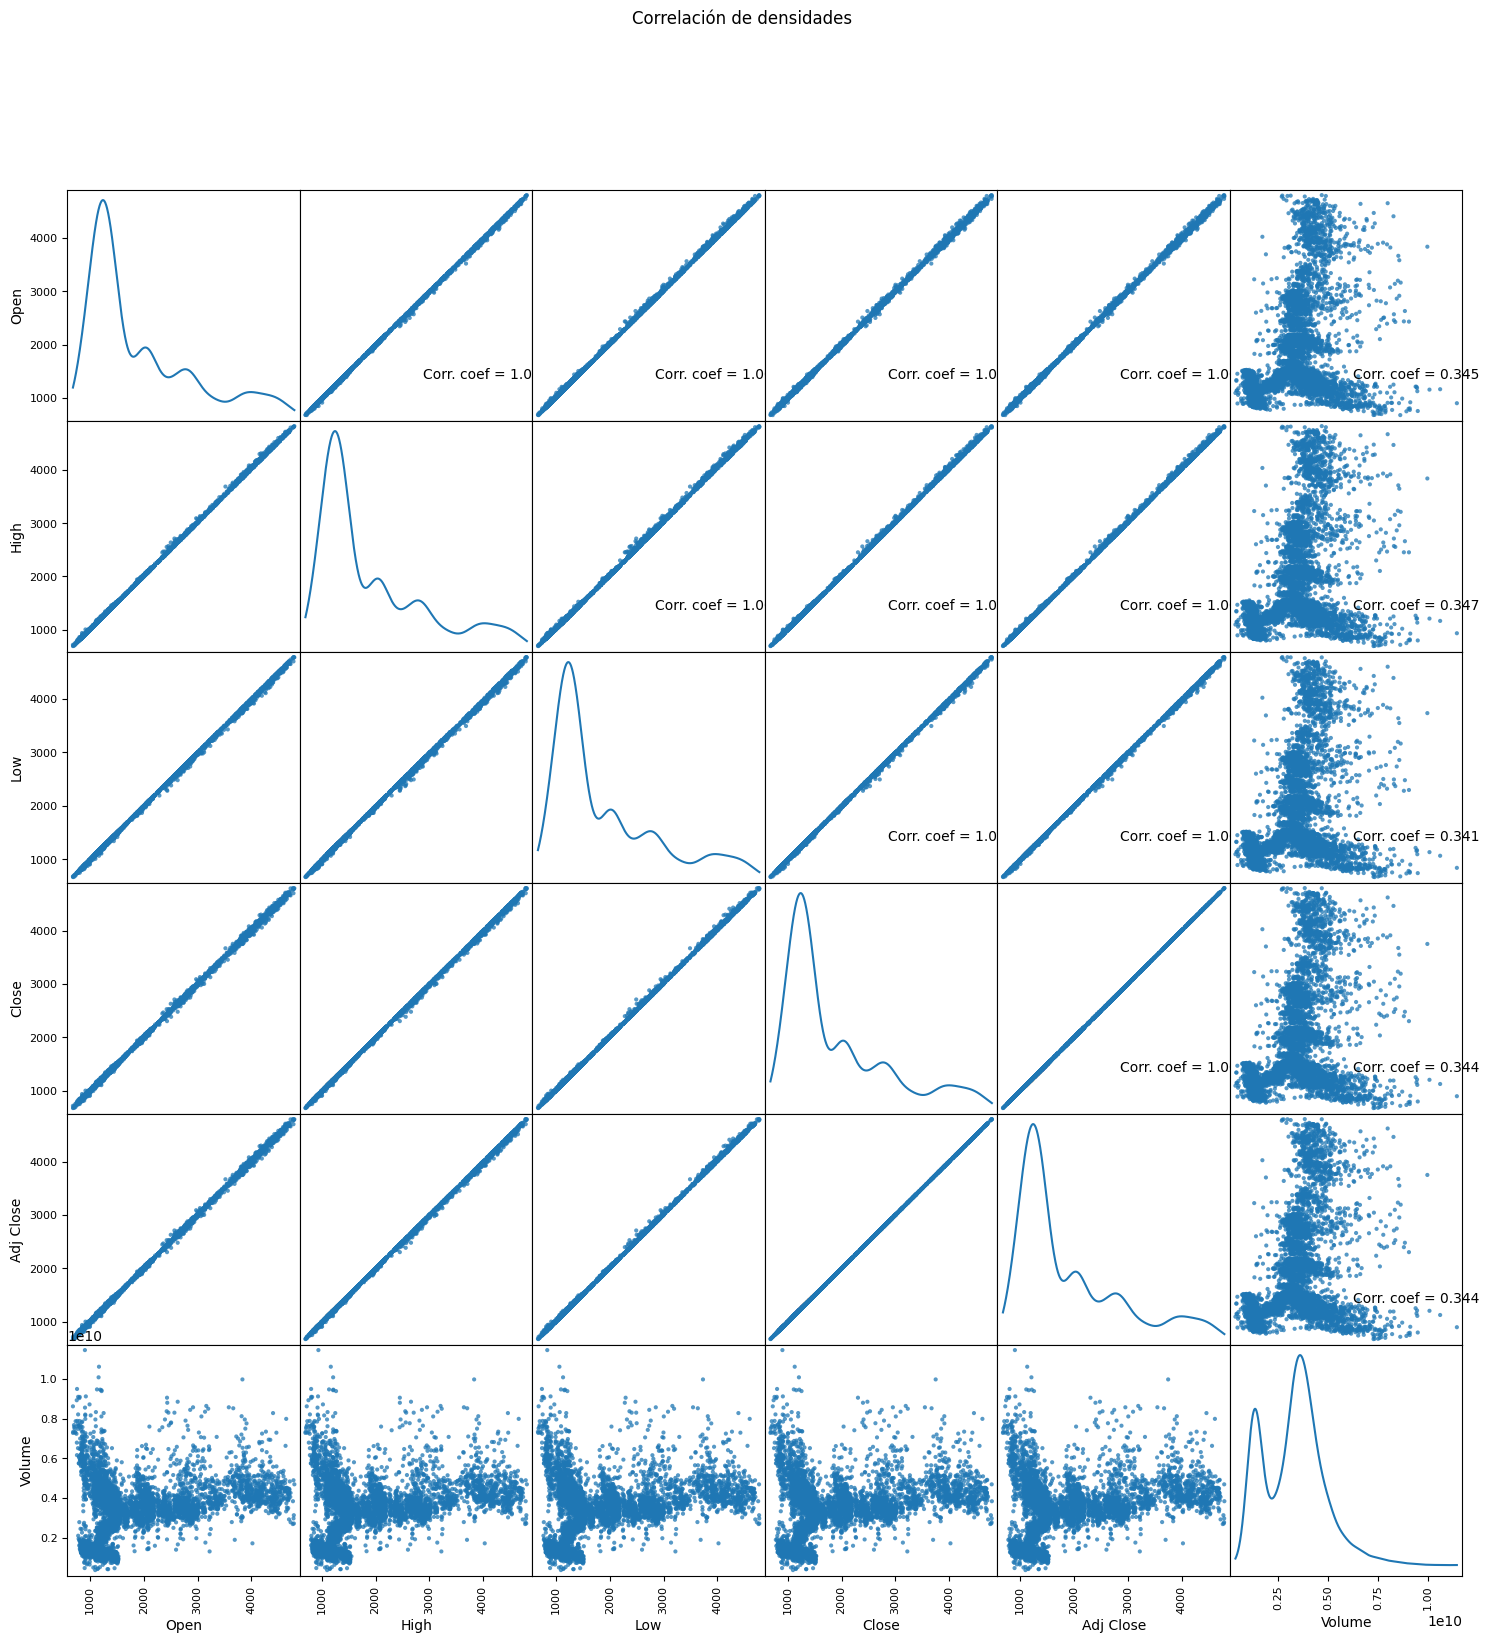

In [12]:
plotScatterMatrix(sp500, 18, 10)

In [13]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de Correlación', fontsize=15)
    plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10924\1784347244.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10924\1784347244.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


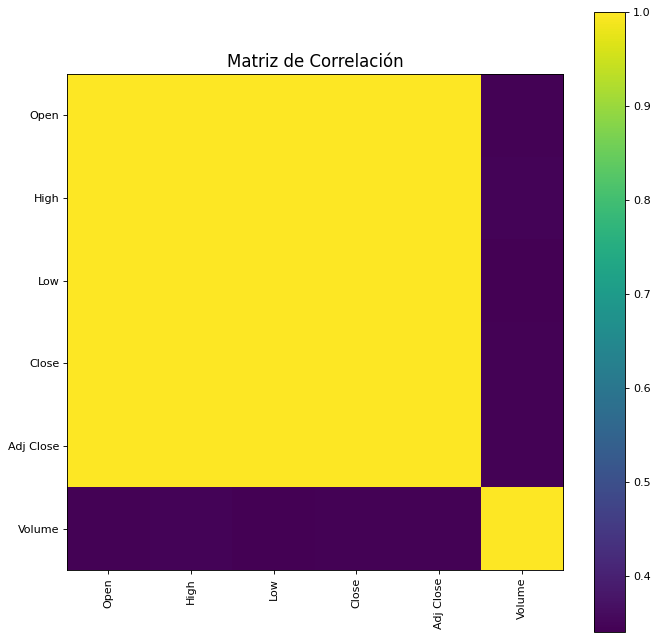

In [14]:
plotCorrelationMatrix(sp500,10)

## Tendencia en el tiempo del S&P500

In [15]:
import statsmodels.api as sm
import plotly.graph_objs as go

In [16]:
# filtro Hodrick-Prescott para separar en tendencia y componente ciclico.
sp500_ciclo, sp500_tend = sm.tsa.filters.hpfilter(sp500['Adj Close'])
sp500['tend'] = sp500_tend

In [17]:
sp500.index.dtype

dtype('<M8[ns]')

In [21]:
fig = go.Figure(data=[go.Candlestick(x=sp500.index,
                open=sp500['Open'],
                high=sp500['High'],
                low=sp500['Low'],
                close=sp500['Close'])])

fig.update_layout(title='S&P 500 Index',
                  xaxis_title='Date',
                  yaxis_title='Price', 
                  plot_bgcolor='black',
                  xaxis=dict(linecolor='white', showgrid=False),
                  yaxis=dict(linecolor='white', showgrid=False),)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(label="All", step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
        fixedrange=False
    ),
    margin=dict(l=50, r=50, b=50, t=50, pad=4),
    height=600,
)

fig.show()


In [ ]:
sp500.to_csv('datasets/GSPC.csv')

## SP500 Por sector

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SP500Companies = pd.read_csv('datasets/companies.csv')

# Setteamos como indice la columna Date y nos aseguremos que tenga sea reconocida como fecha
SP500Companies.set_index('Date', inplace=True)
SP500Companies.index = pd.to_datetime(SP500Companies.index)


In [3]:
SP500Companies['Day Name'] = SP500Companies.index.day_name()
SP500Companies['Daily Return']=SP500Companies['Adj Close'].pct_change() 

In [5]:
SP500Companies.head()

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2000-01-03,25.525517,MMM,Industrials,Monday,NaN
2000-01-04,24.511261,MMM,Industrials,Tuesday,-0.039735
2000-01-05,25.221237,MMM,Industrials,Wednesday,0.028965
2000-01-06,27.249752,MMM,Industrials,Thursday,0.080429
2000-01-07,27.790689,MMM,Industrials,Friday,0.019851


In [6]:
SP500Companies[SP500Companies.duplicated()]

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2002-09-13,3.488165,AOS,Industrials,Friday,0.000000
2002-12-13,12.841619,ACN,Information Technology,Friday,-0.006764
2005-03-24,17.782944,ACN,Information Technology,Thursday,0.004115
2000-09-21,1.071276,ATVI,Communication Services,Thursday,0.000000
2010-06-21,10.370569,ATVI,Communication Services,Monday,0.006103
...,...,...,...,...,...
2000-03-24,7.246359,XEL,Utilities,Friday,0.003322
2000-07-10,8.302968,XEL,Utilities,Monday,0.011905
2000-11-27,10.534277,XEL,Utilities,Monday,-0.016471


In [7]:
SP500Companies.isna().sum()

Adj Close       0
Symbol          0
Sector          0
Day Name        0
Daily Return    1
dtype: int64

In [8]:
SP500Companies.fillna(0)

,Adj Close,Symbol,Sector,Day Name,Daily Return
Date,,,,,
2000-01-03,25.525517,MMM,Industrials,Monday,0.000000
2000-01-04,24.511261,MMM,Industrials,Tuesday,-0.039735
2000-01-05,25.221237,MMM,Industrials,Wednesday,0.028965
2000-01-06,27.249752,MMM,Industrials,Thursday,0.080429
2000-01-07,27.790689,MMM,Industrials,Friday,0.019851
...,...,...,...,...,...
2023-02-16,173.929993,ZTS,Health Care,Thursday,-0.006228
2023-02-17,172.029999,ZTS,Health Care,Friday,-0.010924
2023-02-21,169.839996,ZTS,Health Care,Tuesday,-0.012730


In [19]:
# Guardamos nuestro dataset

SP500Companies.to_csv('datasets/companies.csv')

### Cantidad de empresas por sector

In [9]:
empresas_por_sector = SP500Companies.groupby('Sector')['Symbol'].nunique()
empresas_por_sector

Sector
Communication Services    25
Consumer Discretionary    56
Consumer Staples          33
Energy                    23
Financials                67
Health Care               64
Industrials               70
Information Technology    76
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

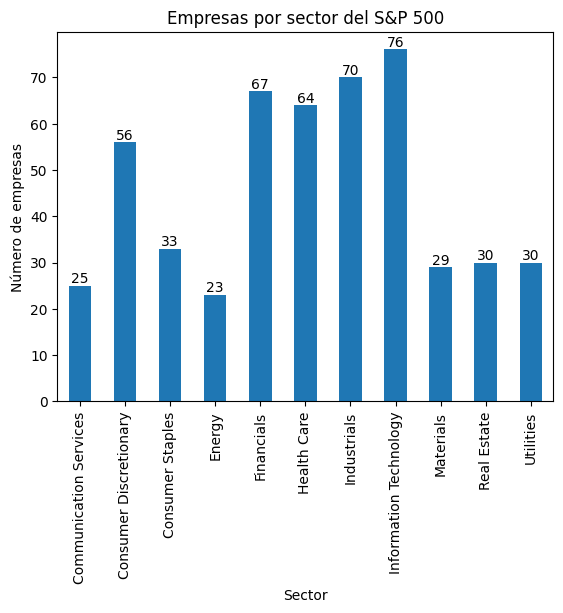

In [12]:
empresas_por_sector.plot(kind='bar')

# Agregar etiquetas a las barras
for i, v in enumerate(empresas_por_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Empresas por sector del S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

plt.show()

In [13]:
# Agrupar los datos por sector y año, y calcular el rendimiento anual promedio
grouped_data = SP500Companies.groupby(['Sector', pd.Grouper(freq='Y')])['Adj Close'].mean().reset_index()
grouped_data

,Sector,Date,Adj Close
0,Communication Services,2000-12-31,16.077914
1,Communication Services,2001-12-31,14.594650
2,Communication Services,2002-12-31,12.576441
3,Communication Services,2003-12-31,13.196849
4,Communication Services,2004-12-31,14.574275
...,...,...,...
259,Utilities,2019-12-31,59.091916
260,Utilities,2020-12-31,60.880419
261,Utilities,2021-12-31,65.841045
262,Utilities,2022-12-31,72.619845


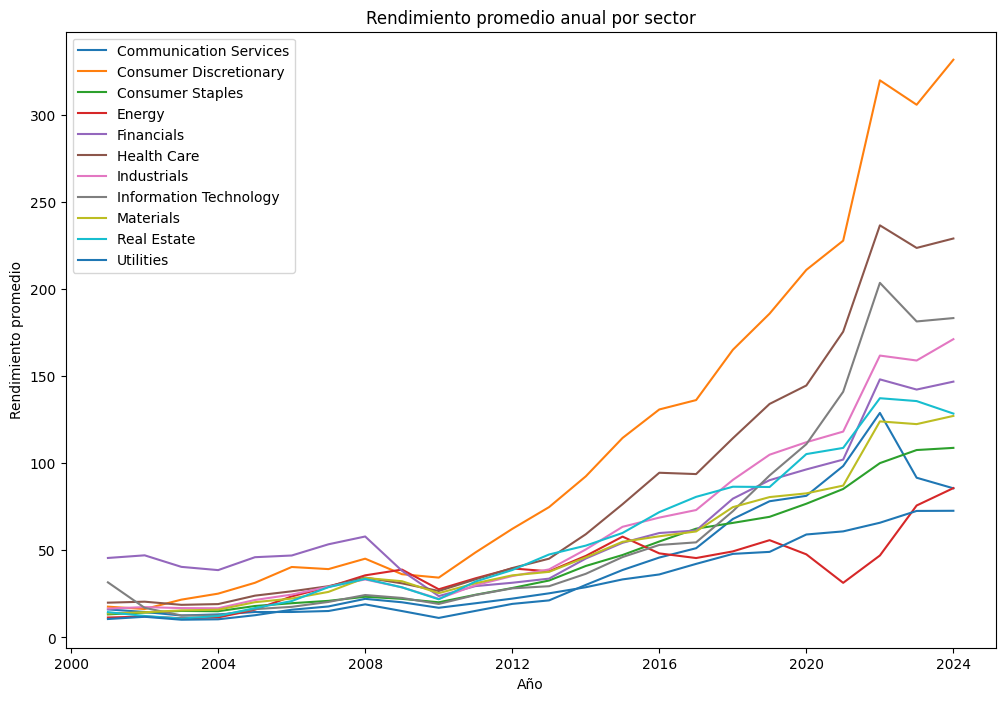

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

# Iterar sobre cada sector y graficar su rendimiento promedio anual
for sector, data in grouped_data.groupby('Sector'):
    ax.plot(data['Date'], data['Adj Close'], label=sector)

# Agregar un título y etiquetas a los ejes
ax.set_title('Rendimiento promedio anual por sector')
ax.set_xlabel('Año')
ax.set_ylabel('Rendimiento promedio')
ax.legend()

plt.show()